#### General Analysis on Zhang Dataset
This notebook focuses on the analysis of the GSE164522 dataset and its different tissue. The analysis inlcudes publicity, MAIT cells, J/V gene usage, unique sequences, and sequence tissue overlap.

In [1]:
import pandas as pd
import collections
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from notebook_utils import plot_count, label_MAIT_single_cell

#### Load Data

In [2]:
Zhang_data_df = pd.read_csv('~/CODON_CVC/single_cell_data/Zhang_TCR_CRC_with_TissueType_cleaned.csv')
# save cdr3_aa column as a list
cdr3_aa = Zhang_data_df['cdr3_aa'].tolist()
# remove cdr3_aa column from dataframe
Zhang_data_df = Zhang_data_df.drop(columns=['cdr3_aa'])
# create a new column in the dataframe with the cdr3_aa list
Zhang_data_df['cdr3_aa'] = cdr3_aa
Zhang_data_df

/tmp/ipykernel_271904/12639481.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  Zhang_data_df = pd.read_csv('~/CODON_CVC/single_cell_data/Zhang_TCR_CRC_with_TissueType_cleaned.csv')


,patient,Cell name,Cell typea,Subtype,Total counts,Number of expressed geneb,Clusterc,Invariant TCR,Clone ID,Clone statusd,...,Identifier (Beta2),CDR3 (Beta2),VDJ (Beta2),TPM (Beta2),tissue,chain,CDR3 (Alpha1),publicity,unique_patients,cdr3_aa
0,P0909,NTC1-0909-ZL,NTC,CD8,"461,634","2,528",CD8_C04-GZMK,diverse,CRC.P0909_C000402:4,Clonal,...,NaN,NaN,NaN,NaN,PN,TRA,NaN,0,1,CALSGWSGNTPLVF
1,P1228,NTC1-20161228,NTC,CD8,"727,142","1,838",CD8_C04-GZMK,diverse,CRC.P1228_C000099:2,Clonal,...,NaN,NaN,NaN,NaN,PN,TRA,NaN,0,1,CAVNLGGGADGLTF
2,P0215,NTC1-20170215,NTC,CD8,"741,498","2,658",CD8_C04-GZMK,diverse,CRC.P0215_C000188:3,Clonal,...,NaN,NaN,NaN,NaN,PN,TRA,NaN,0,1,CAVYNYGQNFVF
3,P0411,NTC1-20170411,NTC,CD8,"363,337","2,385",CD8_C06-CD160,diverse,CRC.P0411_C000034:4,Clonal,...,NaN,NaN,NaN,NaN,PN,TRA,NaN,0,1,CAVGDNYGQNFVF
4,P0413,NTC1-20170413,NTC,CD8,"763,339","2,240",CD8_C06-CD160,diverse,CRC.P0413_C000031:5,Clonal,...,NaN,NaN,NaN,NaN,PN,TRA,NaN,0,1,CVVTSTDSWGKLQF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19237,P1228,NTH213-20161228,NTH,other,"3,132","1,760",NaN,diverse,CRC.P1228_C000705:1,NoClonal,...,NaN,NaN,NaN,NaN,PN,TRB,CAVEALPYNTDKLIF,0,1,CASLAQGGYSNQPQHF
19238,P1228,NTH216-20161228,NTH,DN,"3,508","2,088",NaN,diverse,CRC.P1228_C000355:1,NoClonal,...,NaN,NaN,NaN,NaN,PN,TRB,CALVHGGSQGNLIF,0,1,CASSGGQGGSPLHF
19239,P1228,NTH218-20161228,NTH,other,"3,486","1,803",NaN,diverse,CRC.P1228_C000062:18,Clonal,...,NaN,NaN,NaN,NaN,PN,TRB,CAVRDMAGGFKTIF,0,1,CASSPGATNEKLFF
19240,P1228,NTH235-20161228,NTH,DN,"2,707","1,667",NaN,diverse,CRC.P1228_C000333:1,NoClonal,...,NaN,NaN,NaN,NaN,PN,TRB,CVVSIYGGSNYKLTF,0,1,CASESAGSTDTQYF


#### Initial Column Investigation

In [4]:
collections.Counter(Zhang_data_df['Clusterc'])

Counter({nan: 3897,
         'CD4_C12-CTLA4': 2473,
         'CD8_C07-LAYN': 1556,
         'CD8_C03-CX3CR1': 1297,
         'CD8_C04-GZMK': 1285,
         'CD4_C05-CXCR6': 1035,
         'CD4_C02-ANXA1': 877,
         'CD8_C05-CD6': 866,
         'CD4_C01-CCR7': 833,
         'CD4_C10-FOXP3': 724,
         'CD4_C04-TCF7': 692,
         'CD4_C09-CXCL13': 592,
         'CD8_C06-CD160': 540,
         'CD4_C06-CXCR5': 493,
         'CD4_C08-IL23R': 457,
         'CD4_C03-GNLY': 349,
         'CD4_C07-GZMK': 328,
         'CD8_C02-GPR183': 309,
         'CD8_C01-LEF1': 302,
         'CD4_C11-IL10': 195,
         'CD8_C08-SLC4A10': 142})

In [5]:
Zhang_data_df[Zhang_data_df['cdr3_aa'] == 'CAVMDSSYKLIF']

,patient,Cell name,Cell typea,Subtype,Total counts,Number of expressed geneb,Clusterc,Invariant TCR,Clone ID,Clone statusd,...,Identifier (Beta2),CDR3 (Beta2),VDJ (Beta2),TPM (Beta2),tissue,chain,CDR3 (Alpha1),publicity,unique_patients,cdr3_aa
3007,P0123,PTC21-20180123,PTC,CD8,"2,481","1,692",CD8_C08-SLC4A10,MAIT,CRC.P0123_C000770:1,NoClonal,...,NaN,NaN,NaN,NaN,PBMC,TRA,NaN,1,3,CAVMDSSYKLIF
3027,P0909,TTC226-160909-ZL,TTC,CD8,"5,943","2,627",CD8_C08-SLC4A10,MAIT,CRC.P0909_C000137:1,NoClonal,...,NaN,NaN,NaN,NaN,PT,TRA,NaN,1,3,CAVMDSSYKLIF
3034,P0909,NTC27-0909-ZL,NTC,CD8,"3,938","1,988",CD8_C08-SLC4A10,MAIT,CRC.P0909_C000134:1,NoClonal,...,NaN,NaN,NaN,NaN,PN,TRA,NaN,1,3,CAVMDSSYKLIF
3045,P1012,PTC74-20161012,PTC,CD8,"4,115","2,374",CD8_C08-SLC4A10,MAIT,CRC.P1012_C000070:1,NoClonal,...,NaN,NaN,NaN,NaN,PBMC,TRA,NaN,1,3,CAVMDSSYKLIF
3047,P1012,PTC115-20161012,PTC,CD8,"3,611","2,370",CD8_C08-SLC4A10,MAIT,CRC.P1012_C000069:1,NoClonal,...,NaN,NaN,NaN,NaN,PBMC,TRA,NaN,1,3,CAVMDSSYKLIF
8677,P0909,TTC58-160909-ZL,TTC,other,"3,962","2,148",NaN,MAIT,CRC.P0909_C000136:1,NoClonal,...,NaN,NaN,NaN,NaN,PT,TRA,NaN,1,3,CAVMDSSYKLIF


In [6]:
collections.Counter(Zhang_data_df['Invariant TCR'])

Counter({'diverse': 19032, 'MAIT': 204, 'iNKT': 6})

In [7]:
# how many unique cdr3_aa sequences have the MAIT label in the Invariant TCR column?
len(Zhang_data_df[Zhang_data_df['Invariant TCR'] == 'MAIT']['cdr3_aa'].unique())

135

#### Publicicty Per Tissue Type

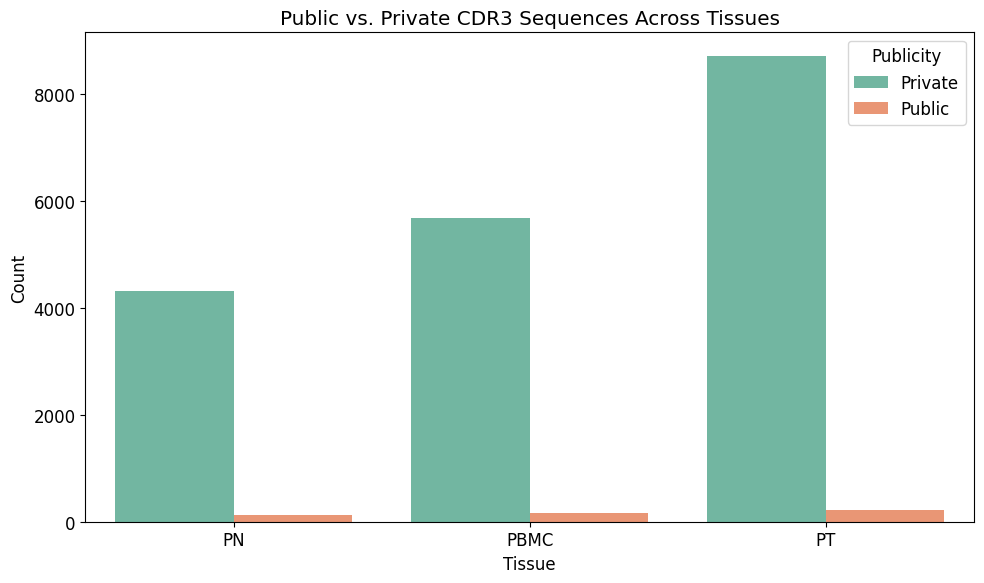

In [8]:
# countplot of publicity across tissues
plot_count(df=Zhang_data_df, X='tissue', hue='publicity', title='Public vs. Private CDR3 Sequences Across Tissues', xlabel='Tissue',
    legend_title='Publicity', labels=['Private', 'Public'],
    figure_name='/home/ubuntu/CODON_CVC/single_cell_data/zhang_data/plots/binary_publicity_across_tissues.png')

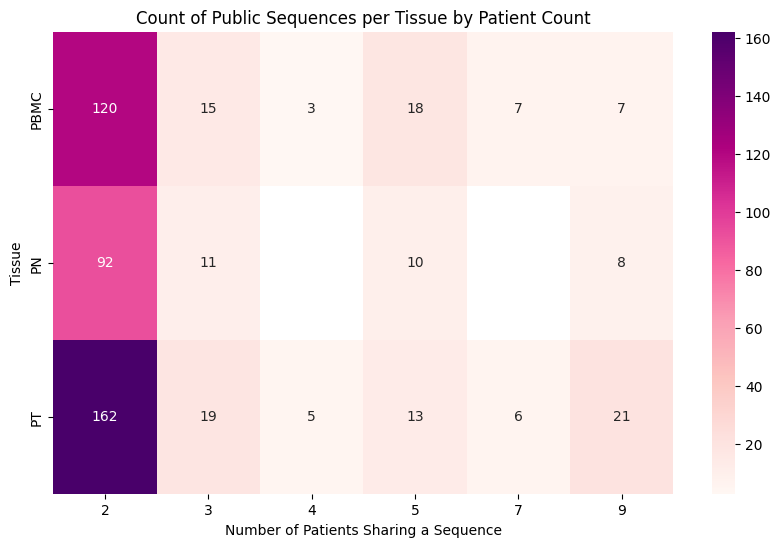

In [23]:
# Filter out private sequences
public_df = Zhang_data_df[Zhang_data_df['publicity'] == 1]

patient_sequence_count = public_df.groupby('tissue')['unique_patients'].value_counts().reset_index(name='sequence_count')

# Correcting the pivot call with keyword arguments
heatmap_data = patient_sequence_count.pivot(index="tissue", columns="unique_patients", values="sequence_count")

# plotting the heatmap
plt.rcParams.update({'font.size': 12})

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="RdPu", fmt="g")
plt.title('Count of Public Sequences per Tissue by Patient Count')
plt.xlabel('Number of Patients Sharing a Sequence')
plt.ylabel('Tissue')
plt.savefig('/home/ubuntu/CODON_CVC/single_cell_data/zhang_data/plots/heatmap_publicity_count_across_tissues.png')
plt.show()


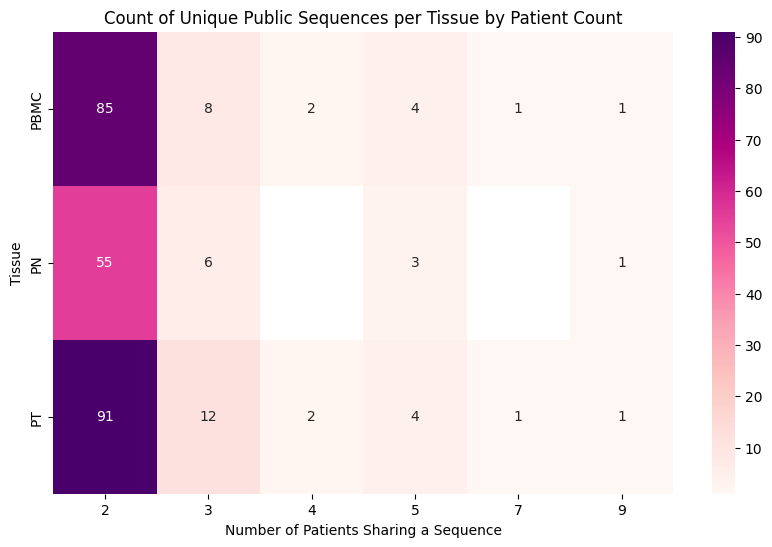

In [24]:
# Calculate the number of unique sequences per tissue and Patient count
unique_patient_sequence_count = public_df.groupby(['tissue', 'unique_patients'])['cdr3_aa'].nunique().reset_index(name='unique_sequence_count')

# Pivot the data for heatmap visualization
unique_heatmap_data = unique_patient_sequence_count.pivot(index='tissue', columns='unique_patients', values='unique_sequence_count')

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(unique_heatmap_data, annot=True, cmap="RdPu", fmt="g")
plt.title('Count of Unique Public Sequences per Tissue by Patient Count')
plt.xlabel('Number of Patients Sharing a Sequence')
plt.ylabel('Tissue')
plt.savefig('/home/ubuntu/CODON_CVC/single_cell_data/zhang_data/plots/heatmap_unique_publicity_count_across_tissues.png')
plt.show()

#### MAIT

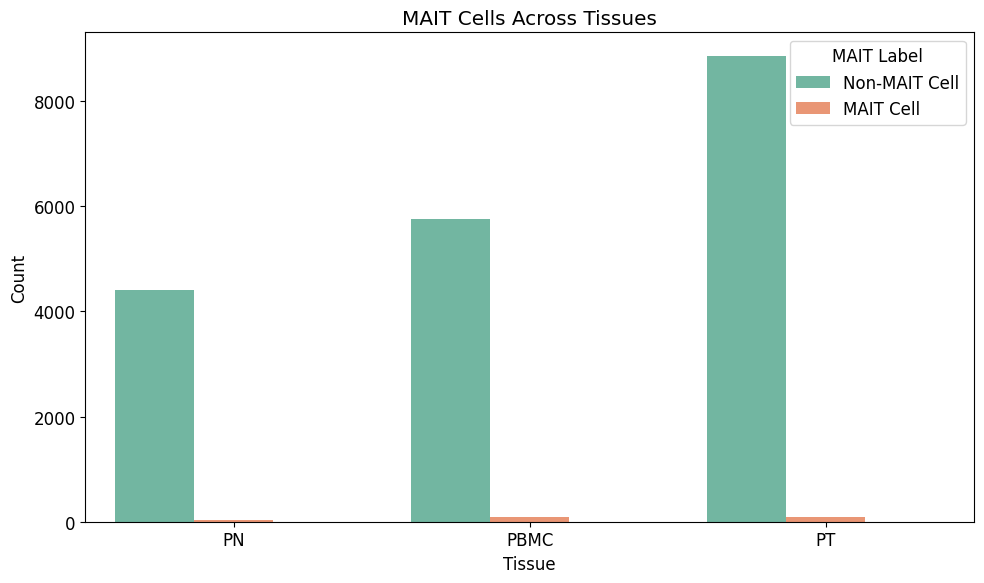

In [9]:
# countplot of MAIT cells across tissues
plot_count(df=Zhang_data_df, X='tissue', hue='Invariant TCR', title='MAIT Cells Across Tissues', xlabel='Tissue', legend_title='MAIT Label', labels=['Non-MAIT Cell', 'MAIT Cell'],
    figure_name='/home/ubuntu/CODON_CVC/single_cell_data/zhang_data/plots/mait_cells_across_tissues.png')

##### MAIT Publicity

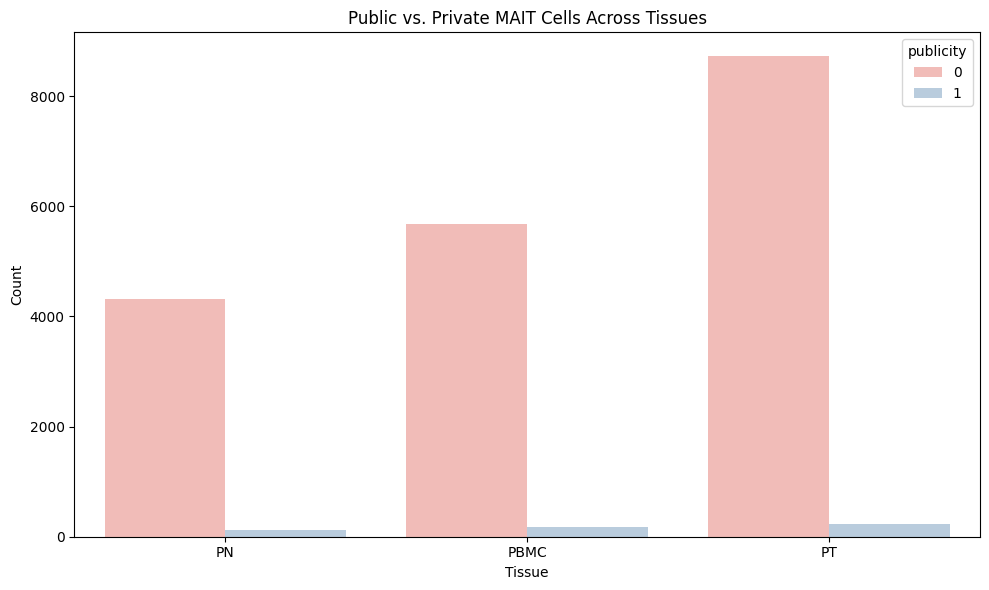

In [26]:
# countplot of MAIT publicity across tissues
plot_count(df=Zhang_data_df, X='tissue', hue='publicity', title='Public vs. Private MAIT Cells Across Tissues', xlabel='Tissue', palette='Pastel1',
    figure_name='/home/ubuntu/CODON_CVC/single_cell_data/zhang_data/plots/MAIT_publicity_across_tissues.png')

##### Percentage of MAIT Across Tisues

In [11]:
MAIT_df = Zhang_data_df[Zhang_data_df['Invariant TCR'] == 'MAIT']

/tmp/ipykernel_271904/4288856076.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=MAIT_tissue_percentage, x='tissue', y='percentage', palette='Paired')


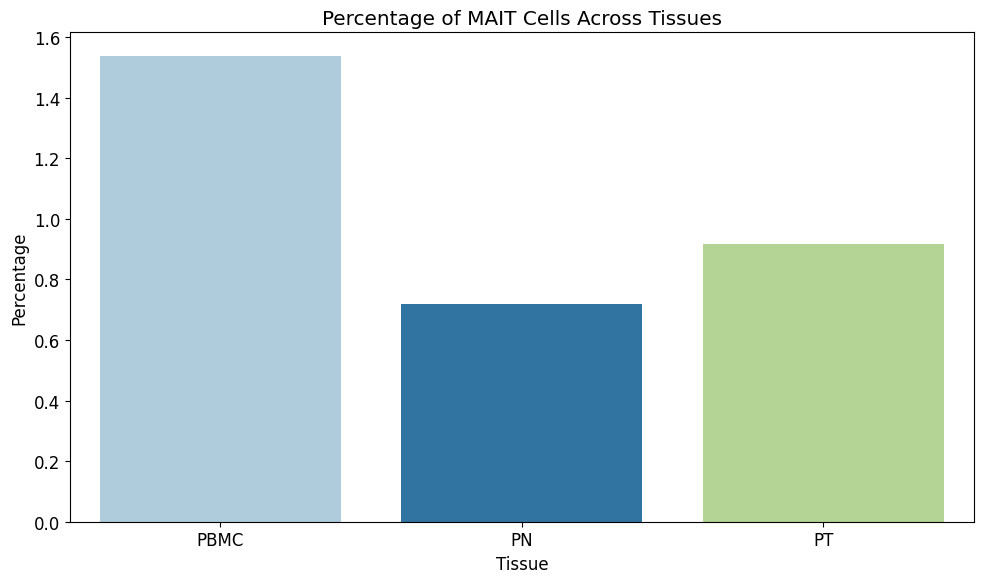

In [12]:
# calculate the percentage of MAIT cells across tissues
MAIT_tissue_count = MAIT_df.groupby('tissue')['Cell name'].count().reset_index(name='MAIT_count')
total_tissue_count = Zhang_data_df.groupby('tissue')['Cell name'].count().reset_index(name='total_count')
MAIT_tissue_percentage = pd.merge(MAIT_tissue_count, total_tissue_count, on='tissue', how='left')
MAIT_tissue_percentage['percentage'] = (MAIT_tissue_percentage['MAIT_count'] / MAIT_tissue_percentage['total_count']) * 100

# plot percentage of MAIT cells across tissues
plt.rcParams.update({'font.size': 12})

plt.figure(figsize=(10, 6))
sns.barplot(data=MAIT_tissue_percentage, x='tissue', y='percentage', palette='Paired')
plt.title('Percentage of MAIT Cells Across Tissues')
plt.xlabel('Tissue')
plt.ylabel('Percentage')
plt.tight_layout()
plt.savefig('/home/ubuntu/CODON_CVC/single_cell_data/zhang_data/plots/percentage_mait_cells_across_tissues.png', dpi=1200)
plt.show()


In [32]:
# calculate the percentage of public MAIT cells across tissues
public_MAIT_df = MAIT_df[MAIT_df['publicity'] == 1]
public_MAIT_tissue_count = public_MAIT_df.groupby('tissue')['Cell name'].count().reset_index(name='public_MAIT_count')
total_public_tissue_count = Zhang_data_df[Zhang_data_df['publicity'] == 1].groupby('tissue')['Cell name'].count().reset_index(name='total_public_count')
public_MAIT_tissue_percentage = pd.merge(public_MAIT_tissue_count, total_public_tissue_count, on='tissue', how='left')
public_MAIT_tissue_percentage['percentage'] = (public_MAIT_tissue_percentage['public_MAIT_count'] / public_MAIT_tissue_percentage['total_public_count']) * 100
public_MAIT_tissue_percentage

,tissue,public_MAIT_count,total_public_count,percentage
0,PBMC,32,170,18.823529
1,PN,7,121,5.785124
2,PT,23,226,10.176991


/tmp/ipykernel_311989/1010603439.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=public_MAIT_tissue_percentage, x='tissue', y='percentage', palette='Paired')


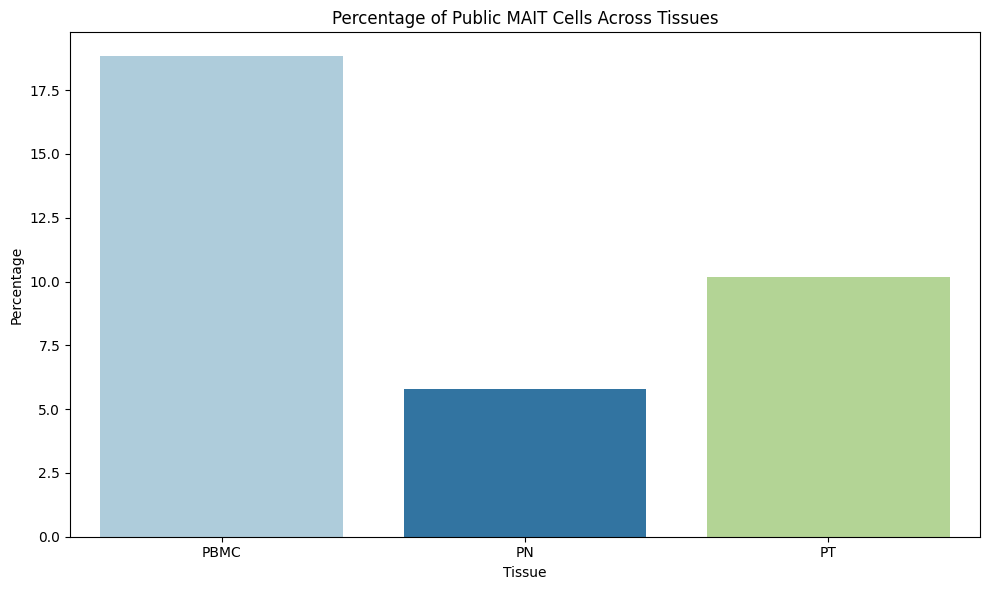

In [33]:
# plot percentage of public MAIT cells across tissues
plt.figure(figsize=(10, 6))
sns.barplot(data=public_MAIT_tissue_percentage, x='tissue', y='percentage', palette='Paired')
plt.title('Percentage of Public MAIT Cells Across Tissues')
plt.xlabel('Tissue')
plt.ylabel('Percentage')
plt.tight_layout()
plt.savefig('/home/ubuntu/CODON_CVC/single_cell_data/zhang_data/plots/percentage_public_mait_cells_across_tissues.png')
plt.show()

In [34]:
# calculate the percentage of private MAIT cells across tissues out of the total MAIT cells
public_MAIT_df = MAIT_df[MAIT_df['publicity'] == 1]
public_MAIT_tissue_count = public_MAIT_df.groupby('tissue')['Cell name'].count().reset_index(name='private_MAIT_count')
total_MAIT_tissue_count = MAIT_df.groupby('tissue')['Cell name'].count().reset_index(name='total_MAIT_count')
public_MAIT_tissue_percentage = pd.merge(public_MAIT_tissue_count, total_MAIT_tissue_count, on='tissue', how='left')
public_MAIT_tissue_percentage['percentage'] = (public_MAIT_tissue_percentage['private_MAIT_count'] / public_MAIT_tissue_percentage['total_MAIT_count']) * 100
public_MAIT_tissue_percentage

,tissue,private_MAIT_count,total_MAIT_count,percentage
0,PBMC,32,90,35.555556
1,PN,7,32,21.875000
2,PT,23,82,28.048780


/tmp/ipykernel_311989/2396638428.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=public_MAIT_tissue_percentage, x='tissue', y='percentage', palette='Paired')


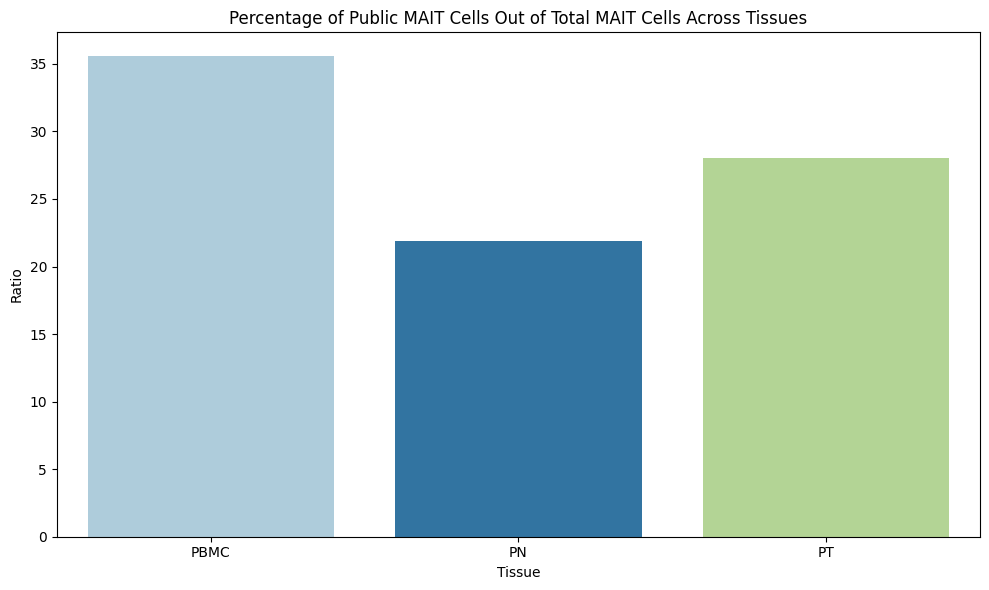

In [35]:
# plot ratio of public vs. private MAIT cells across tissues
plt.figure(figsize=(10, 6))
sns.barplot(data=public_MAIT_tissue_percentage, x='tissue', y='percentage', palette='Paired')
plt.title('Percentage of Public MAIT Cells Out of Total MAIT Cells Across Tissues')
plt.xlabel('Tissue')
plt.ylabel('Ratio')
plt.tight_layout()
plt.savefig('/home/ubuntu/CODON_CVC/single_cell_data/zhang_data/plots/ratio_public_private_mait_cells_across_tissues.png')
plt.show()


##### Unique MAIT sequences

In [37]:
# how many unique cdr3_aa sequences have the MAIT label in the Invariant TCR column that are public and private?
len(MAIT_df[MAIT_df['publicity'] == 1]['cdr3_aa'].unique()), len(MAIT_df[MAIT_df['publicity'] == 0]['cdr3_aa'].unique())

(11, 124)

In [38]:
# print the public cdr3_aa sequences for MAIT cells
public_MAIT_df['cdr3_aa'].unique()

array(['CAVMDSNYQLIWGAG', 'CAVKDSNYQLIWGAG', 'CAVMDSSYKLIF',
       'CAAMDSNYQLIWGAG', 'CAVLDSNYQLIWGAG', 'CAVTDSNYQLIWGAG',
       'CAVRDSNYQLIWGAG', 'CAVVDSNYQLIWGAG', 'CAVDNDYKLSF', 'CAVNDYKLSF',
       'CASSQGGYEQYF'], dtype=object)

#### Tissues across Patients

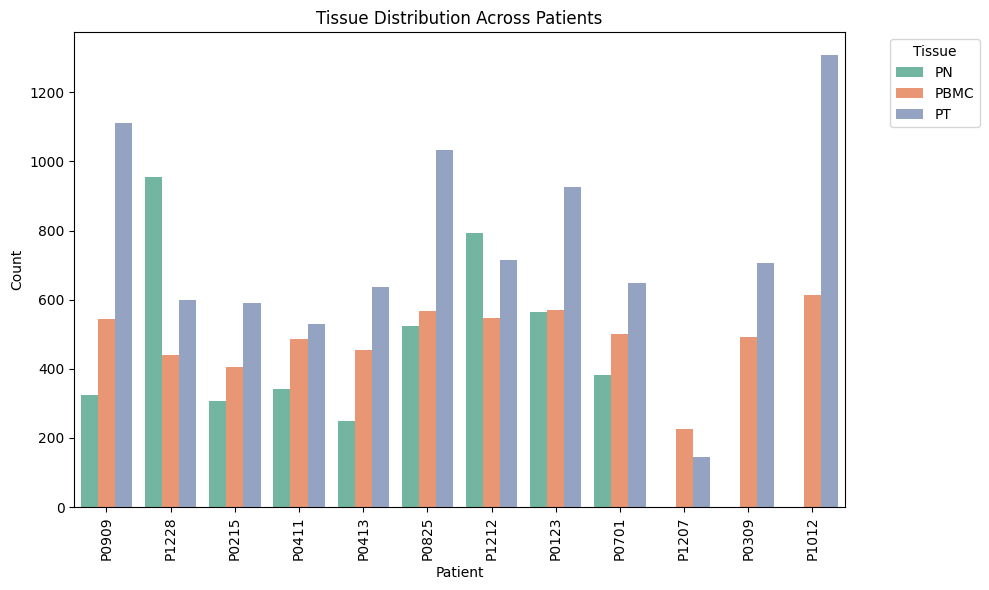

In [36]:
# tissue distribution across patients
plot_count(df=Zhang_data_df, X='Patient', hue='tissue', title='Tissue Distribution Across Patients', xlabel='Patient', legend_title='Tissue', rotation=90,
    figure_name='/home/ubuntu/CODON_CVC/single_cell_data/zhang_data/plots/tissue_distribution_across_patients.png')